Cubic spline for N = 1486 nodes for error < 1e-10
Chebyshev interpolation for N = 116 nodes for error < 1e-10


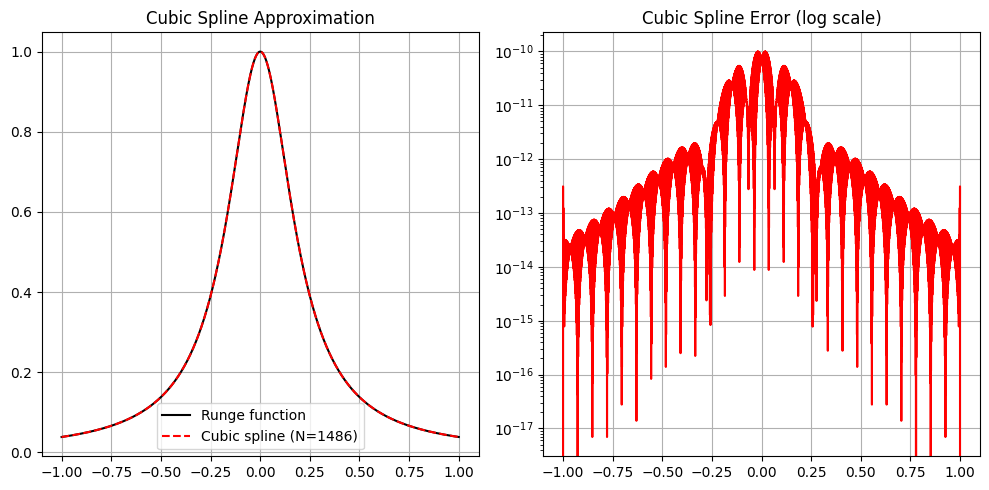

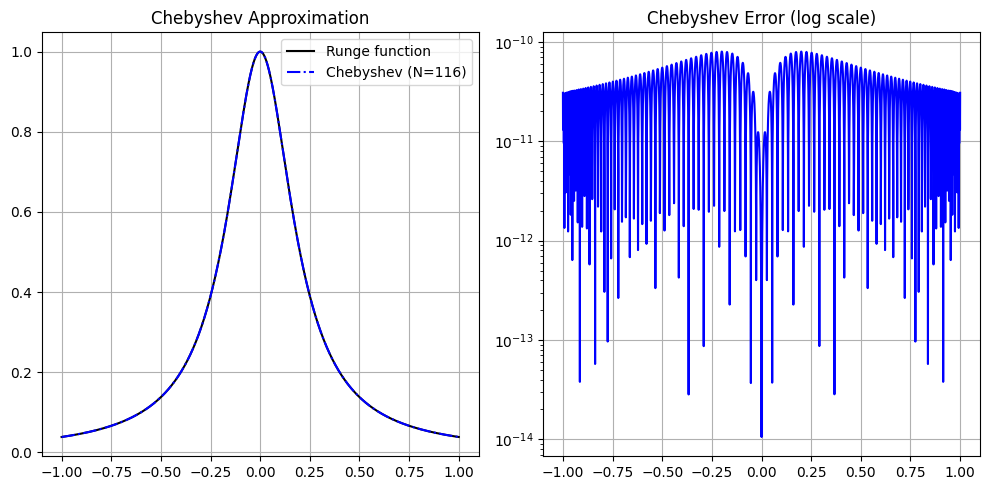

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, BarycentricInterpolator

# Runge function
def f(x):
    return 1 / (1 + 25 * x**2)

# Define error check function
def max_error(f, g, xs):
    return np.max(np.abs(f(xs) - g(xs)))

# Dense test points
test_x = np.linspace(-1, 1, 3000) #We pick 3000 equally spaced points
f_true = f(test_x)

tol = 1e-10

# --------------------------
# 1. Cubic spline interpolation (uniform nodes)
N_spline = None
spline_approx = None
for N in range(5, 3000):
    nodes = np.linspace(-1, 1, N+1)
    spline = CubicSpline(nodes, f(nodes)) #builds the cubic spline interpolation.
    err = max_error(f, spline, test_x)
    if err < tol:
        N_spline = N
        spline_approx = spline(test_x)
        break

print("Cubic spline for N =", N_spline, "nodes for error <", tol)

# --------------------------
# 2. Chebyshev polynomial interpolation
N_cheb = None
cheb_approx = None
for N in range(5, 200):
    k = np.arange(N+1)
    nodes = np.cos((2*k+1)/(2*(N+1)) * np.pi)  # Chebyshev nodes
    interp = BarycentricInterpolator(nodes, f(nodes))
    err = max_error(f, interp, test_x)
    if err < tol:
        N_cheb = N
        cheb_approx = interp(test_x)
        break

print("Chebyshev interpolation for N =", N_cheb, "nodes for error <", tol)

# --------------------------
# Plot Cubic Spline
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(test_x, f_true, 'k', label='Runge function')
plt.plot(test_x, spline_approx, 'r--', label=f'Cubic spline (N={N_spline})')
plt.title("Cubic Spline Approximation")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(test_x, np.abs(f_true - spline_approx), 'r')
plt.title("Cubic Spline Error (log scale)")
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# Plot Chebyshev

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(test_x, f_true, 'k', label='Runge function')
plt.plot(test_x, cheb_approx, 'b-.', label=f'Chebyshev (N={N_cheb})')
plt.title("Chebyshev Approximation")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(test_x, np.abs(f_true - cheb_approx), 'b')
plt.title("Chebyshev Error (log scale)")
plt.grid(True)

plt.tight_layout()
plt.show()

